# Análisis Exploratorio (EDA)

## 1. Inspección Inicial

Primero, se cargaran el conjunto de datos y se examina su estructura. Esto te dará una buena idea de qué tipo de limpieza y preprocesamiento podrían ser necesarios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar el conjunto de datos
df_users = pd.read_csv(
    'users_final.csv', 
    delimiter='\t'
)

# Ver las primeras filas para inspeccionar los datos
print(df_users.head())

# Obtener información general sobre el DataFrame

# Obtener estadísticas descriptivas del DataFrame
print(df_users.describe())

                    id                                name     screen_name  \
0  1505615838518333446                   Personaldata.info  personal_data1   
1             21862091                      personal jesus         sentiny   
2  1629321749086244864  Sindel's personal foot stool 🙇🏻‍♂️  Oneandonlysir1   
3   994324172154130432          ytywrld (personal account)      JimmyYitty   
4            385133876      Personal Branding Expert Dubai  girlnamedrobyn   

   statuses_count  followers_count  friends_count  favourites_count  \
0             443              610            216              5706   
1            5400              641            307              2579   
2            1000              287            333              4552   
3            6453              289            510             22721   
4            1607              593            157               188   

   listed_count  default_profile  default_profile_image  ... tweets_count  \
0            14            

## 2. Análisis de Valores Faltantes

Es crucial saber si hay valores faltantes en el conjunto de datos y decidir cómo manejarlos.

In [18]:
# Contar los valores faltantes en cada columna
print(df_users.isnull().sum())

# Obtener las filas donde 'is_fake' es NaN
nan_is_fake_rows = df_users[df_users['is_fake'].isna()]
nan_name_rows = df_users[df_users['name'].isna()]

# Mostrar las IDs de esas filas
print(nan_is_fake_rows['screen_name'])
print(nan_name_rows['screen_name'])

id                                 0
name                               1
screen_name                        0
statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
default_profile                    0
default_profile_image              0
location                         391
description                      112
description_has_url                0
description_url                 1093
followers_to_following_ratio       0
verified_type                   1145
verified                           0
is_blue_verified                   0
has_graduated_access               0
can_dm                             0
media_count                        0
has_custom_timelines               0
has_verification_info            141
possibly_sensitive                 0
profile_image_url_https          141
created_at                       141
response_count                     0
m

## 3. Exploración de la Variable Objetivo

Es vital entender cómo está distribuida la variable objetivo, que en el caso de perfiles es is_fake.

Conteo de clases: 
0.0    720
1.0    483
Name: is_fake, dtype: int64

Porcentaje de clases: 
0.0    59.850374
1.0    40.149626
Name: is_fake, dtype: float64


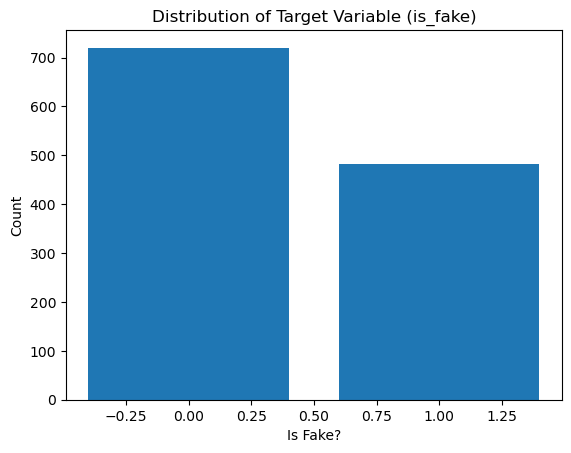

In [3]:
import matplotlib.pyplot as plt

# Contar las clases en la variable objetivo
fake_counts = df_users['is_fake'].value_counts()
total_count = len(df_users)
fake_percentage = (fake_counts / total_count) * 100

print(f"Conteo de clases: \n{fake_counts}")
print(f"\nPorcentaje de clases: \n{fake_percentage}")

# Gráfico de barras para la variable objetivo
plt.bar(df_users['is_fake'].value_counts().index, df_users['is_fake'].value_counts().values)
plt.xlabel('Is Fake?')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (is_fake)')
plt.show()

Matriz de correlacion

C:\Users\fpmir\AppData\Local\Temp\ipykernel_20628\3480939428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_users.corr()


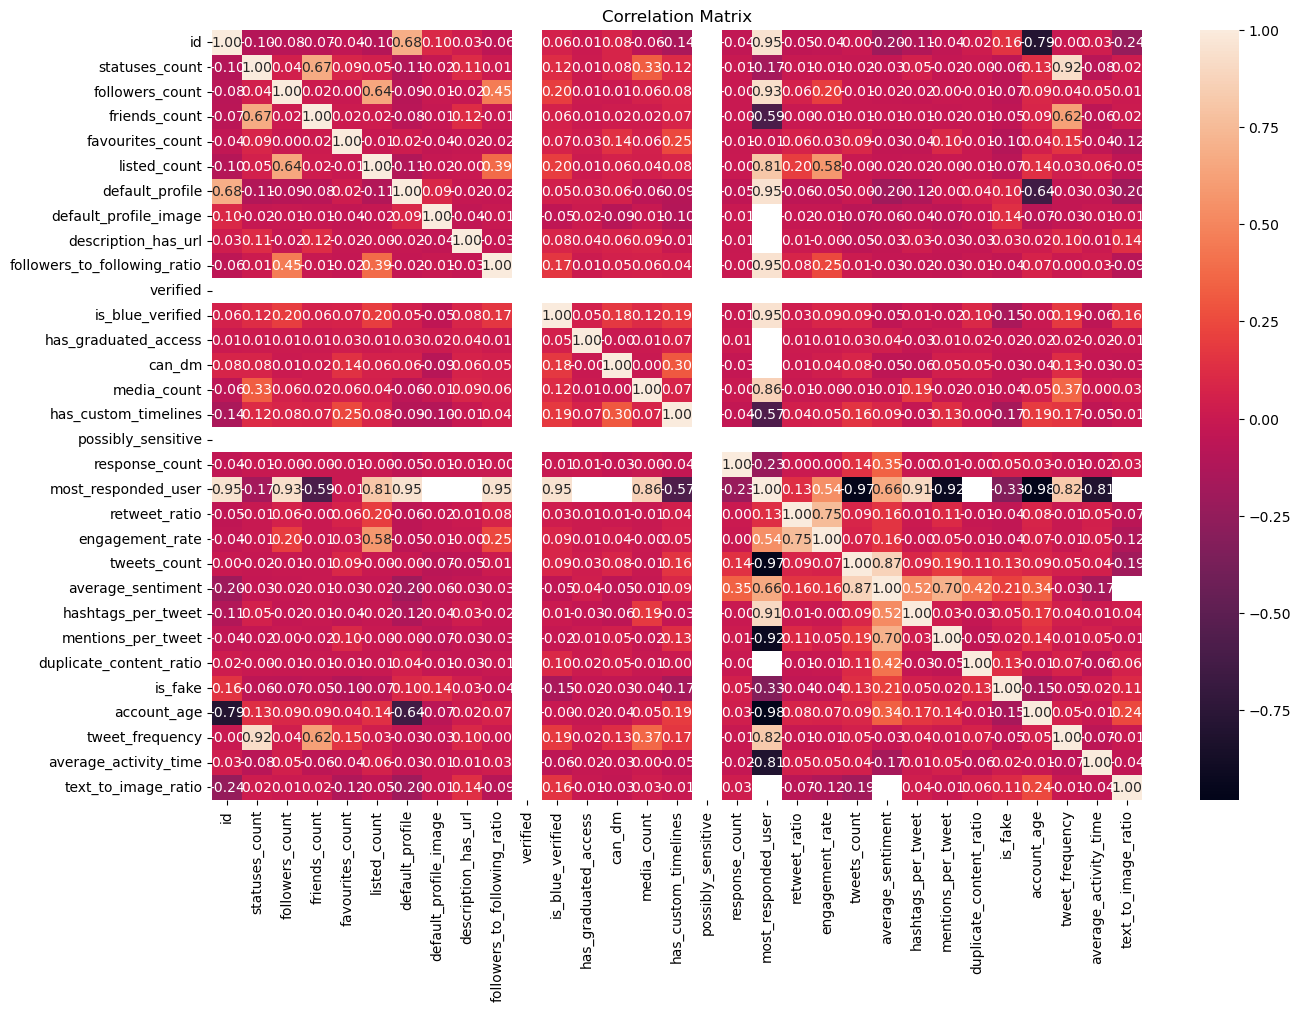

In [4]:
correlation_matrix = df_users.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [5]:
# Displaying features that are highly correlated with 'is_fake'
high_corr_features = correlation_matrix.index[abs(correlation_matrix["is_fake"]) > 0.2]
print("Features highly correlated with 'is_fake':")
print(high_corr_features.tolist())

Features highly correlated with 'is_fake':
['most_responded_user', 'average_sentiment', 'is_fake']


## Siguientes Pasos:

1. Manejo de valores faltantes: Necesitaremos decidir qué hacer con las columnas que tienen valores faltantes. Se pueden rellenar con un valor específico (como la media o la mediana), o quizás eliminar las columnas o filas completamente si tienen demasiados valores faltantes.

In [6]:
# Ejemplo para rellenar con la media
# df_users['columna'].fillna(df_users['columna'].mean(), inplace=True)

2. Variable Objetivo: Es crucial que la columna is_fake tenga valores para entrenar el modelo. Si todos los valores son faltantes, tendrás que buscar una manera de obtener esta información.

3. Normalización: Las columnas con rangos muy amplios (como followers_count) podrían beneficiarse de la normalización.

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_users[['followers_count']] = scaler.fit_transform(df_users[['followers_count']])

# Análisis Exploratorio Profundo

1. Correlación: Es útil entender qué variables están más correlacionadas con la variable objetivo.

In [8]:
corr_matrix = df_users.corr()
print(corr_matrix['is_fake'].sort_values(ascending=False))

is_fake                         1.000000
average_sentiment               0.212462
id                              0.155419
default_profile_image           0.136509
duplicate_content_ratio         0.130149
tweets_count                    0.127612
text_to_image_ratio             0.105937
default_profile                 0.100688
hashtags_per_tweet              0.051059
response_count                  0.045841
description_has_url             0.034331
mentions_per_tweet              0.021165
average_activity_time           0.018572
has_graduated_access           -0.021863
can_dm                         -0.029523
followers_to_following_ratio   -0.035725
media_count                    -0.038750
retweet_ratio                  -0.039441
engagement_rate                -0.041638
friends_count                  -0.047813
tweet_frequency                -0.049220
statuses_count                 -0.055220
followers_count                -0.065164
listed_count                   -0.074558
favourites_count

C:\Users\fpmir\AppData\Local\Temp\ipykernel_20628\2224776138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


2. Visualización: Gráficos como histogramas y gráficos de caja para variables numéricas, y gráficos de barras para variables categóricas, pueden ser útiles.

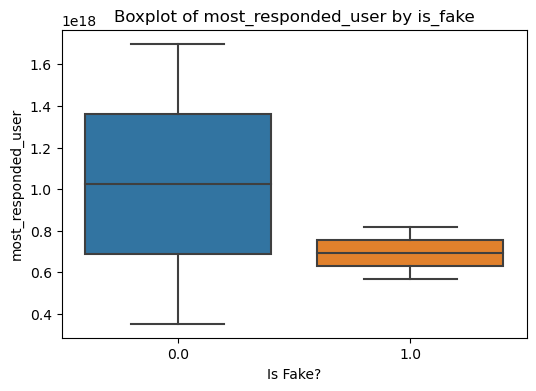

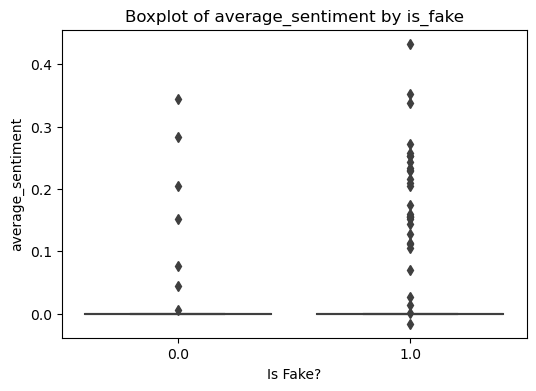

In [9]:
for feature in high_corr_features:
    if feature != 'is_fake':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='is_fake', y=feature, data=df_users)
        plt.title(f"Boxplot of {feature} by is_fake")
        plt.xlabel('Is Fake?')
        plt.ylabel(feature)
        plt.show()

3. Conversión de Variables Categóricas: Si decidimos incluir variables categóricas en el modelo, necesitaremos convertirlas en una forma que el modelo pueda entender, generalmente mediante codificación one-hot.

In [10]:
# df_users = pd.get_dummies(df_users, columns=['columna_categorica'])

# Creacion de nuevo csv con pre procesado

In [27]:
from sklearn.preprocessing import MinMaxScaler

preprocess_file_name = 'users_final_to_process.csv'
df_users.to_csv(preprocess_file_name, index=False, sep='\t')


df_preprocessed = pd.read_csv(preprocess_file_name, delimiter='\t')
# Normalize specified columns
columns_to_normalize = [
    'statuses_count',
    'followers_count',
    'friends_count',
    'favourites_count',
    'listed_count',
    'media_count',
    'response_count',
    'tweets_count'
]
scaler = MinMaxScaler()
df_preprocessed[columns_to_normalize] = scaler.fit_transform(df_preprocessed[columns_to_normalize])
# Drop 'most_responded_user' column
if 'most_responded_user' in df_users.columns:
    df_preprocessed.drop(['most_responded_user'], axis=1, inplace=True)

categorical_columns = [
    'default_profile',
    'default_profile_image',
    'verified',
    'is_blue_verified',
    'can_dm',
    'has_custom_timelines'
]

for col in categorical_columns:
    df_preprocessed[col] = df_preprocessed[col].astype('category')

df_preprocessed['id'] = df_preprocessed['id'].astype(str)

numeric_columns = df_preprocessed.select_dtypes(include=['float64']).columns
df_preprocessed[numeric_columns] = df_preprocessed[numeric_columns].fillna(-1)

string_columns = ['name', 'screen_name', 'location', 'description', 'description_url', 
                  'verified_type', 'has_verification_info', 'profile_image_url_https', 
                  'created_at', 'top_words']
df_preprocessed[string_columns] = df_preprocessed[string_columns].fillna('')
bool_columns = df.select_dtypes(include=['bool']).columns
df_preprocessed[bool_columns] = df_preprocessed[bool_columns].astype(int)

processed_file_path = 'users_final_processed.csv'
df_preprocessed.to_csv(processed_file_path, index=False, sep='\t')

print(df_preprocessed.head())

                    id                                name     screen_name  \
0  1505615838518333446                   Personaldata.info  personal_data1   
1             21862091                      personal jesus         sentiny   
2  1629321749086244864  Sindel's personal foot stool 🙇🏻‍♂️  Oneandonlysir1   
3   994324172154130432          ytywrld (personal account)      JimmyYitty   
4            385133876      Personal Branding Expert Dubai  girlnamedrobyn   

   statuses_count  followers_count  friends_count  favourites_count  \
0        0.000161         0.000022       0.000723          0.005467   
1        0.001966         0.000023       0.001028          0.002471   
2        0.000364         0.000010       0.001115          0.004361   
3        0.002350         0.000011       0.001707          0.021768   
4        0.000585         0.000022       0.000526          0.000180   

   listed_count default_profile default_profile_image  ... tweets_count  \
0      0.000553            Tr